In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 

from sklearn.linear_model import LinearRegression

In [3]:
import tensorflow as tf

In [4]:
car_data = pd.read_csv("cardekho_data.csv")

In [28]:
car_data.head()

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,1,ritz,2014,3.35,5.59,27000,Petrol,Manual
1,2,sx4,2013,4.75,9.54,43000,Diesel,Manual
2,3,ciaz,2017,7.25,9.85,6900,Petrol,Manual
3,4,wagon r,2011,2.85,4.15,5200,Petrol,Manual
4,5,swift,2014,4.60,6.87,42450,Diesel,Manual


In [29]:
car_data.describe(include='all')

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
count,301.000000,301,301.000000,301.000000,301.000000,301.000000,301,301
unique,NaN,98,NaN,NaN,NaN,NaN,3,2
top,NaN,city,NaN,NaN,NaN,NaN,Petrol,Manual
freq,NaN,26,NaN,NaN,NaN,NaN,239,261
mean,151.000000,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN
std,87.035433,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN
min,1.000000,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN
25%,76.000000,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN
50%,151.000000,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN
75%,226.000000,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN


In [5]:
car_data.isnull().sum()

Unnamed: 0       0
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Transmission     0
dtype: int64

In [6]:
#drop first column as it has no useful value butjust count
car_data1 = car_data.loc[:, ~car_data.columns.str.contains('^Unnamed')]

In [32]:
car_data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Manual
298,city,2009,3.35,11.00,87934,Petrol,Manual
299,city,2017,11.50,12.50,9000,Diesel,Manual


In [7]:
print(car_data1["Year"].unique())
print(car_data1["Fuel_Type"].unique())
print(car_data1["Transmission"].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [8]:
#remove columncar name
car_data2=car_data1.drop(['Car_Name'], axis=1)

In [9]:
car_data2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual


In [22]:
#one hot encoding - creating summies for categorical variables

In [10]:
car_data_wDummies = pd.get_dummies(car_data2, columns=['Year','Fuel_Type','Transmission'], drop_first=True)

In [11]:
car_data_wDummies

,Selling_Price,Present_Price,Kms_Driven,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,4.75,9.54,43000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,7.25,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,2.85,4.15,5200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,4.60,6.87,42450,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
297,4.00,5.90,60000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
298,3.35,11.00,87934,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
299,11.50,12.50,9000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [12]:
car_data_wDummies.corr()["Selling_Price"]

Selling_Price          1.000000
Present_Price          0.878983
Kms_Driven             0.029187
Year_2004             -0.035969
Year_2005             -0.049715
Year_2006             -0.073729
Year_2007             -0.072550
Year_2008             -0.111247
Year_2009             -0.051843
Year_2010              0.027141
Year_2011             -0.116937
Year_2012             -0.046480
Year_2013             -0.077478
Year_2014              0.007552
Year_2015              0.125756
Year_2016              0.048543
Year_2017              0.110647
Year_2018              0.052209
Fuel_Type_Diesel       0.552339
Fuel_Type_Petrol      -0.540571
Transmission_Manual   -0.367128
Name: Selling_Price, dtype: float64

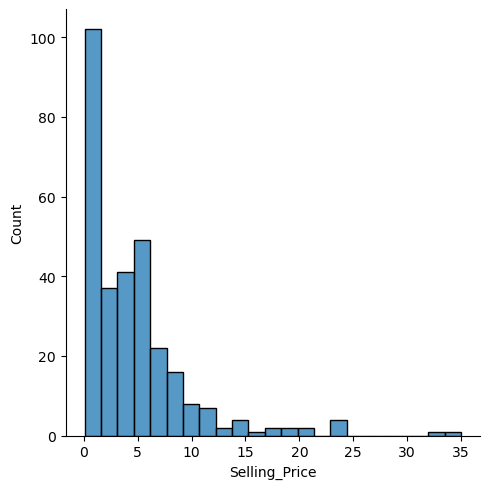

In [15]:
#plot graphs to check for optimal 
sns.displot(car_data_wDummies['Selling_Price'])

In [1]:
#use sklearn f statistic to choose features

In [22]:
#isolate the ones with strong correlation

In [20]:
car_data3 = car_data_wDummies[['Selling_Price','Present_Price','Fuel_Type_Diesel','Fuel_Type_Petrol','Transmission_Manual']]

In [21]:
car_data3

,Selling_Price,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,0,1,1
1,4.75,9.54,1,0,1
2,7.25,9.85,0,1,1
3,2.85,4.15,0,1,1
4,4.60,6.87,1,0,1
...,...,...,...,...,...
296,9.50,11.60,1,0,1
297,4.00,5.90,0,1,1
298,3.35,11.00,0,1,1
299,11.50,12.50,1,0,1


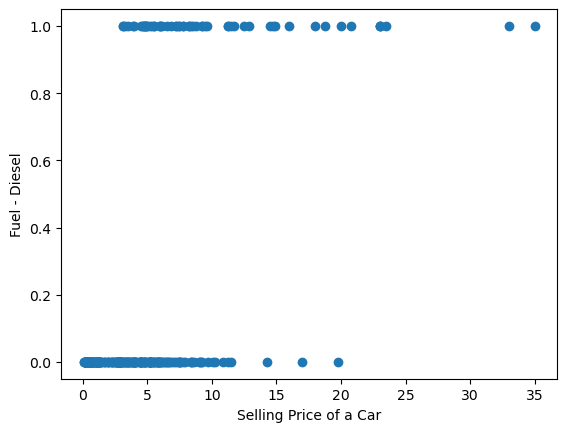

In [27]:
plt.scatter(car_data3['Selling_Price'],car_data3['Fuel_Type_Diesel'])
plt.xlabel("Selling Price of a Car")
plt.ylabel("Fuel - Diesel")
plt.show()

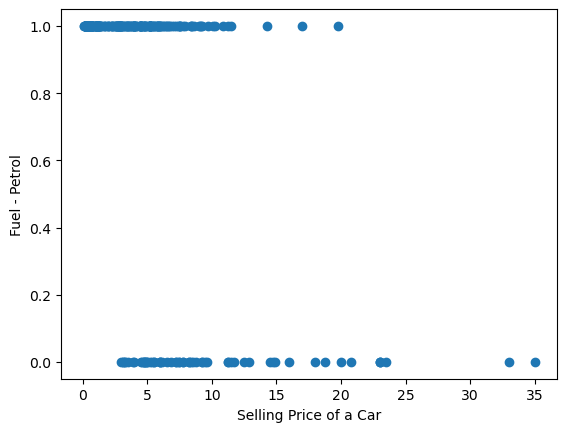

In [28]:
plt.scatter(car_data3['Selling_Price'],car_data3['Fuel_Type_Petrol'])
plt.xlabel("Selling Price of a Car")
plt.ylabel("Fuel - Petrol")
plt.show()

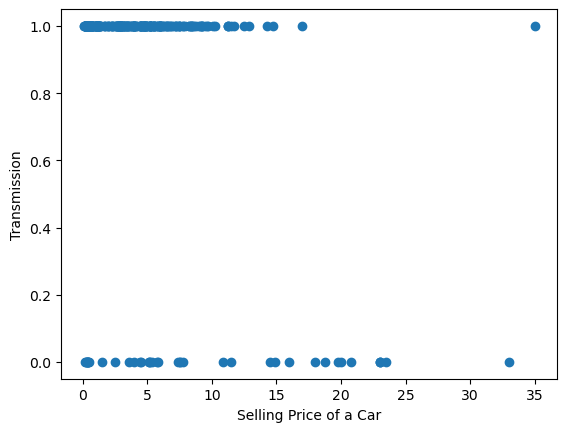

In [29]:
plt.scatter(car_data3['Selling_Price'],car_data3['Transmission_Manual'])
plt.xlabel("Selling Price of a Car")
plt.ylabel("Transmission")
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

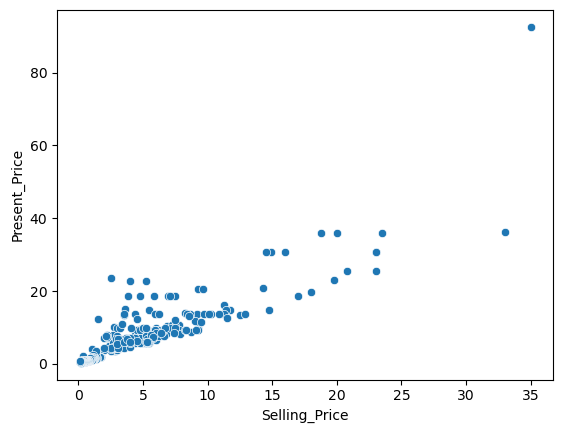

In [39]:
sns.scatterplot(data = car_data3, x='Selling_Price',y='Present_Price')

In [41]:
car_data_np = car_data3.to_numpy()
car_data_np.shape

(301, 5)

In [43]:
car_data3

,Selling_Price,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,0,1,1
1,4.75,9.54,1,0,1
2,7.25,9.85,0,1,1
3,2.85,4.15,0,1,1
4,4.60,6.87,1,0,1
...,...,...,...,...,...
296,9.50,11.60,1,0,1
297,4.00,5.90,0,1,1
298,3.35,11.00,0,1,1
299,11.50,12.50,1,0,1


In [51]:
# declare inputs and targets
target = car_data3['Selling_Price']
inputs = car_data3.drop(['Selling_Price'],axis=1)

In [53]:
from sklearn.model_selection import train_test_split

In [88]:
#train test split data
x_train,x_test,y_train,y_test = train_test_split(inputs,target, test_size=0.2, random_state=365)

In [89]:
sklearn_model = LinearRegression().fit(x_train, y_train)
sklearn_y_predictions = sklearn_model.predict(x_test)
sklearn_y_predictions

array([13.29939806,  3.14455118,  2.22731862,  0.92746905,  3.72109736,
        1.16572165,  7.28520101,  3.14455118,  0.58992747,  0.65491995,
        5.39832261,  0.94319304, 21.72682828,  0.59726533, 18.92271731,
        9.92683078,  0.92746905,  5.08384287,  6.39878977,  5.9224555 ,
        8.71545714,  5.08384287,  0.65491995,  0.44526679,  0.64967862,
        1.13427367,  7.36319429,  7.35857962, 50.70898432, 12.99540098,
        6.85478538,  2.77241683,  1.07422626,  3.82592393,  7.82967256,
        3.14455118,  2.47890241,  4.14040367,  0.81740114,  6.83382007,
        3.32799769,  1.39918865,  8.7259398 ,  1.07422626, 18.92271731,
        3.14979251,  5.73091912,  7.32650498,  7.28520101,  7.10112784,
        0.40333616,  0.58154134, 12.89279628, 18.92271731,  3.24937776,
        3.93075051,  5.39832261, 12.89279628,  0.42954281,  9.97861741,
        4.19805829])

In [90]:
sklearn_model.predict([[5.59,0,1,1]])

C:\Users\sasha\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.08689656])

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test,sklearn_y_predictions)

0.7494191100022436

In [78]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

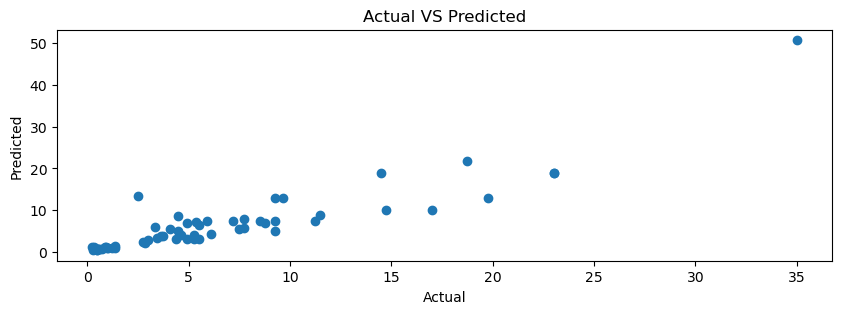

In [92]:
plt.figure(figsize =(10,3))
plt.scatter(y_test,sklearn_y_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

In [93]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':sklearn_y_predictions,
                          'Difference':y_test-sklearn_y_predictions})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
85,2.50,13.299398,-10.799398
234,5.50,3.144551,2.355449
20,2.85,2.227319,0.622681
123,1.00,0.927469,0.072531
294,3.75,3.721097,0.028903
185,0.25,1.165722,-0.915722
257,8.50,7.285201,1.214799
202,4.40,3.144551,1.255449
150,0.50,0.589927,-0.089927
133,0.72,0.654920,0.065080
